In [2]:
# We will perform sentiment analysis on a dataset of customer reviews using TF-IDF vectorization and Logistic Regression.

# Steps for Sentiment Analysis
# 1	Import required libraries
# 2	Load and preprocess the dataset
# 3	Convert text into numerical format using TF-IDF
# 4	Split data into training and testing sets
# 5	Train a Logistic Regression model
# 6	Make predictions on test data
# 7	Evaluate model performance
# 8	Display final results

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [11]:
# Load the dataset (Make sure you have the CSV file)
df = pd.read_csv(r"C:\Users\Vyshnavi\Documents\CODETECH\customer_reviews.csv")
 # Load customer reviews dataset

# Display first 5 rows to inspect data
print(df.head())


                                       Review Sentiment
0          I love this product! It's amazing.  Positive
1  Worst experience ever, never buying again.  Negative
2   The quality is okay, but could be better.   Neutral
3        Excellent service and fast delivery!  Positive
4  Terrible quality, completely disappointed.  Negative


In [13]:
# Function to clean text data
def clean_text(text):
    text = text.lower()  # Convert text to lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

# Apply cleaning function to dataset
df['Cleaned_Review'] = df['Review'].apply(clean_text)

In [15]:
# Initialize TF-IDF Vectorizer (Limit features to top 5000 words)
tfidf = TfidfVectorizer(max_features=5000)

# Transform text data into numerical format
X = tfidf.fit_transform(df['Cleaned_Review'])

# Encode sentiment labels (Convert categorical values to numbers)
y = df['Sentiment'].map({'Positive': 1, 'Negative': 0, 'Neutral': 2})

# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Initialize Logistic Regression model
model = LogisticRegression(max_iter=1000, solver='liblinear')

# Train the model using training data
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000, solver='liblinear')

In [19]:
# Predict sentiments on test data
y_pred = model.predict(X_test)

In [21]:
# Calculate model accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Generate classification report
class_report = classification_report(y_test, y_pred)

# Print performance results
print(f"Model Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Model Accuracy: 0.50
Confusion Matrix:
 [[1 2]
 [0 1]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.33      1.00      0.50         1

    accuracy                           0.50         4
   macro avg       0.67      0.67      0.50         4
weighted avg       0.83      0.50      0.50         4



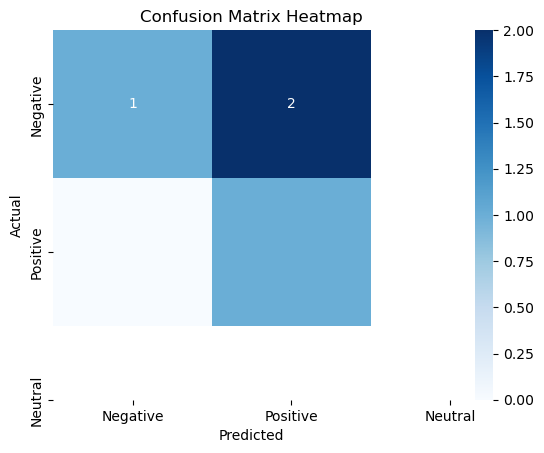

In [23]:
# Plot confusion matrix heatmap
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d",
            xticklabels=['Negative', 'Positive', 'Neutral'],
            yticklabels=['Negative', 'Positive', 'Neutral'])

# Set plot labels
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")

# Show plot
plt.show()